In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape

(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
y_train[0]

5

In [ ]:
single_image.shape

(28, 28)

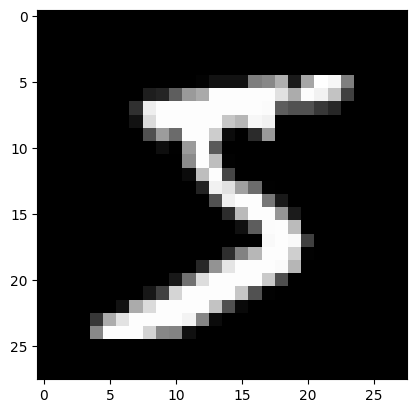

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()

1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

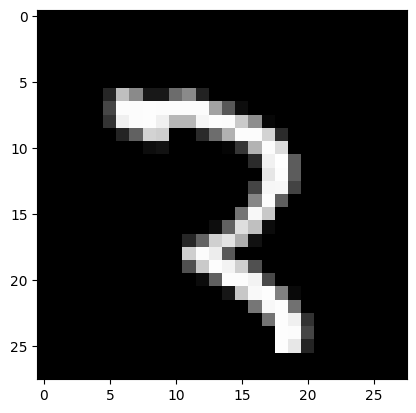

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')

In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
model = keras.Sequential()
input = keras.Input(shape=(28,28,1))
model.add(input)

model.add(layers.Conv2D(filters=32,kernel_size=(5,5),strides=(1,1),padding='valid',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64,kernel_size=(5,5),strides=(1,1),padding='same',activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(20,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(5,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2304)              0         
                                                                 
 dense (Dense)               (None, 20)               

In [ ]:
model.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,
          batch_size=64, 
          validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 117s 123ms/step - loss: 0.7966 - accuracy: 0.7566 - val_loss: 0.3250 - val_accuracy: 0.9500
Epoch 2/5
938/938 [==============================] - 114s 122ms/step - loss: 0.2081 - accuracy: 0.9618 - val_loss: 0.1038 - val_accuracy: 0.9760
Epoch 3/5
938/938 [==============================] - 114s 122ms/step - loss: 0.0836 - accuracy: 0.9781 - val_loss: 0.0696 - val_accuracy: 0.9834
Epoch 4/5
938/938 [==============================] - 116s 124ms/step - loss: 0.0608 - accuracy: 0.9833 - val_loss: 0.0609 - val_accuracy: 0.9837
Epoch 5/5
938/938 [==============================] - 116s 123ms/step - loss: 0.0494 - accuracy: 0.9863 - val_loss: 0.0567 - val_accuracy: 0.9853


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,0.796619,0.756583,0.325031,0.9500
1,0.208118,0.961767,0.103850,0.9760
2,0.083554,0.978100,0.069578,0.9834
3,0.060785,0.983350,0.060863,0.9837
4,0.049435,0.986283,0.056731,0.9853


<Axes: >

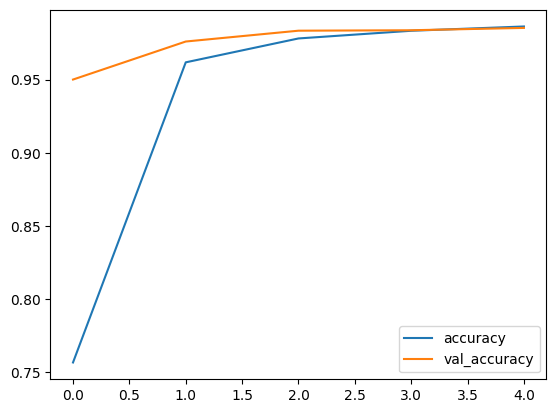

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

<Axes: >

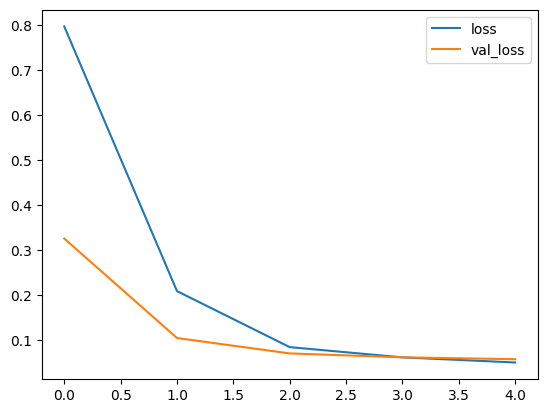

In [ ]:
metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)

313/313 [==============================] - 6s 19ms/step


In [ ]:
print(confusion_matrix(y_test,x_test_predictions))

[[ 963    1    0    0    0    0   13    2    1    0]
 [   0 1130    4    0    0    0    1    0    0    0]
 [   0    7 1018    3    0    0    1    3    0    0]
 [   0    0    3 1000    0    4    0    1    2    0]
 [   0    9    1    0  969    0    0    0    0    3]
 [   1    0    0    8    0  877    1    0    3    2]
 [   2    2    2    0    0    3  948    0    1    0]
 [   1    2    8    2    5    0    0 1006    1    3]
 [   0    2    2    2    1    1    4    0  961    1]
 [   1    3    0    0   10    2    1    3    8  981]]


In [ ]:
print(classification_report(y_test,x_test_predictions))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.98      1.00      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.98      0.99      0.98       958
           7       0.99      0.98      0.98      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



**Prediction for a single input**



In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Lab/Exp 3/eight.png')

In [ ]:
type(img)

PIL.Image.Image

In [ ]:
img = image.load_img('/content/drive/MyDrive/Colab Notebooks/Deep Learning/Lab/Exp 3/eight.png')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
print(x_single_prediction)

[3]


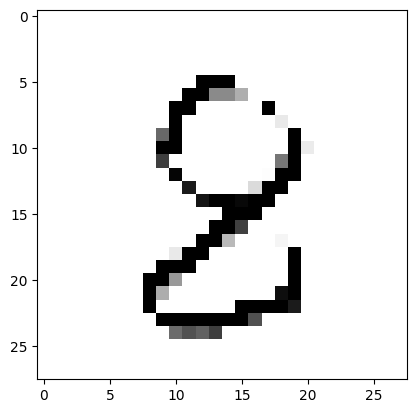

In [ ]:
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0


In [ ]:
x_single_prediction = np.argmax(
    model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),
     axis=1)

1/1 [==============================] - 0s 23ms/step


In [ ]:
print(x_single_prediction)

[8]


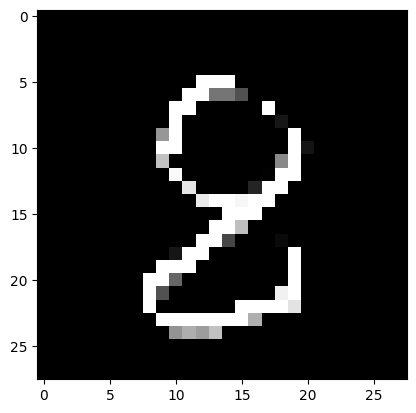

In [ ]:
plt.imshow(img_28_gray_inverted_scaled.reshape(28,28),cmap='gray')